# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Read Data

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Itvedant class/Itvedant Home work/AB_NYC_2019.csv')

# Data Inspection

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
# Removing unimportant columns
df.drop(['id','name','host_id','host_name','last_review'],axis=1,inplace=True)

In [10]:
df.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [11]:
df.shape

(48895, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


Price cannot be 0, replacing it with median value

In [14]:
df[df.price==0].index

Int64Index([23161, 25433, 25634, 25753, 25778, 25794, 25795, 25796, 26259,
            26841, 26866],
           dtype='int64')

In [15]:
df.loc[df[df.price==0].index,'price']=int(df.price.mean())

# Checking Null Values

In [16]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
df.reviews_per_month.median()

0.72

In [18]:
df.reviews_per_month.fillna(df.reviews_per_month.median(),inplace=True)

No Null values, data is clean now

# Checking Outliers

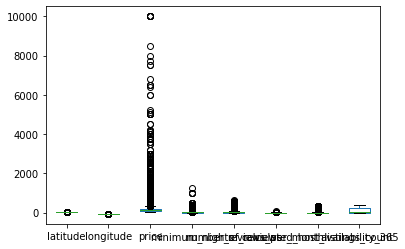

In [19]:
df.plot(kind='box')

In [20]:
continous_col = []
for x in df.columns:
  if df[x].dtypes != 'O':
    continous_col.append(x)

In [21]:
len(continous_col)

8

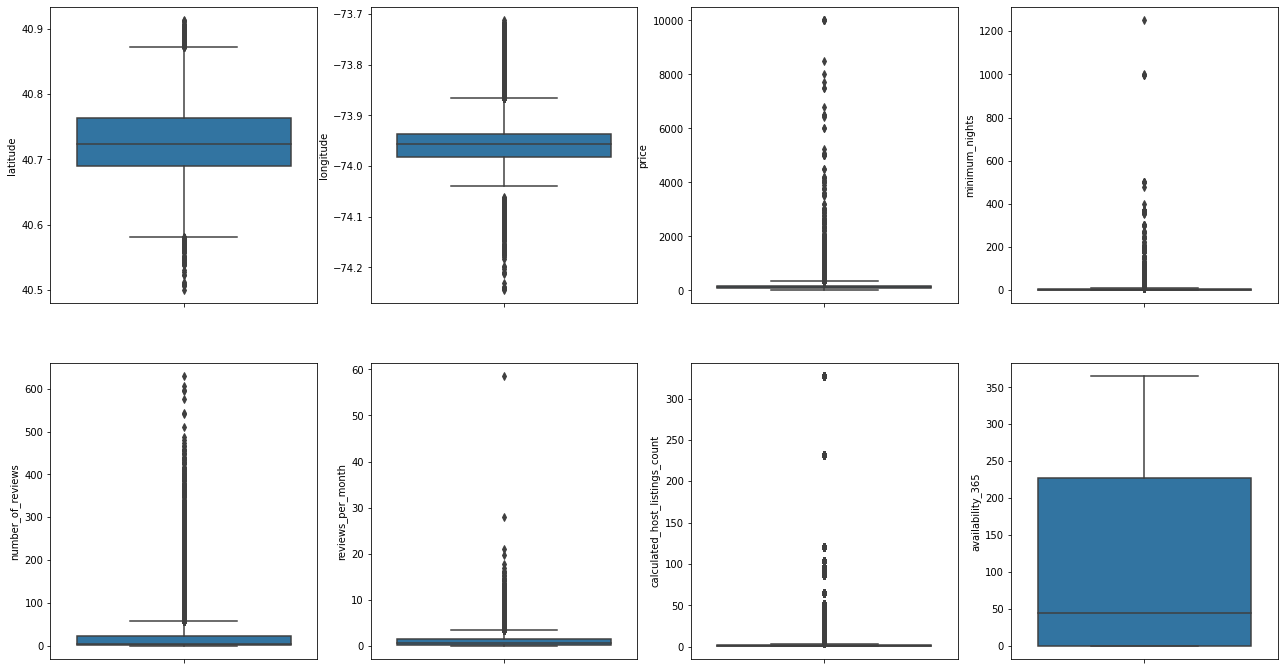

In [22]:
plt.figure(figsize=(22,12))
i = 1
for x in continous_col:
  plt.subplot(2,4,i)
  sns.boxplot(y=df[x])
  i+=1


Handling outliers of Price column

In [23]:
df[df.price>5000].index

Int64Index([ 3537,  3720,  3774,  4377,  6530,  9151, 12342, 15560, 17692,
            29238, 29662, 29664, 30268, 37194, 40433, 42523, 43009, 44034,
            45666, 48043],
           dtype='int64')

In [24]:
# shrinking outliers to limit value
df.loc[df[df.price>5000].index,'price'] = 5000

Handling outliers of minimum_nights column

In [25]:
df[df.minimum_nights>250].index

Int64Index([  700,   754,  1305,  1449,  1757,  1758,  2150,  2214,  2831,
             2854,  3398,  3945,  3978,  4372,  4381,  4437,  4794,  5385,
             5767,  5909,  7328,  7355,  8014,  8658, 10829, 11193, 11748,
            13404, 13788, 13886, 14285, 15381, 15899, 15946, 15980, 16598,
            17338, 17811, 18043, 19794, 20096, 21281, 21708, 23011, 23972,
            24012, 26341, 27064, 30518, 31730, 32915, 34487, 38469, 38664,
            39875, 40933, 44070, 44429, 44736, 47620, 48446],
           dtype='int64')

In [26]:
# shrinking outliers to limit value
df.loc[df[df.minimum_nights>250].index,'minimum_nights'] = 250

Handling outliers of number_of_reviews column

In [27]:
df[df.number_of_reviews>450].index

Int64Index([  113,   225,   471,  1103,  1190,  1271,  1879,  2015,  2030,
             2031,  4870,  8001, 10623, 11759, 13495, 13612, 20403],
           dtype='int64')

In [28]:
df.loc[df[df.number_of_reviews>450].index,'number_of_reviews'] = 450

Handling Outliers of reviews_per_month column

In [29]:
df[df.reviews_per_month>15].index

Int64Index([20403, 22469, 27287, 28651, 29628, 36238, 38870, 40036, 40297,
            42075, 42076],
           dtype='int64')

In [30]:
df.loc[df[df.reviews_per_month>15].index,'reviews_per_month']=15

Outliers are handled.

# Handling Skewness

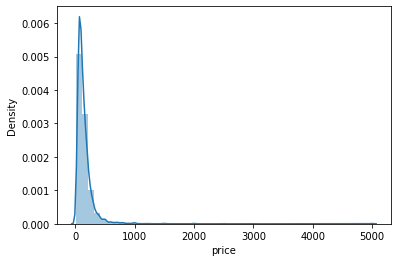

In [31]:
sns.distplot(df.price)

Log Transformation

In [32]:
df.price=np.log(df.price)

# Create X and Y

In [33]:
X = df.drop('price',axis=1)

In [34]:
Y = df.price

In [35]:
Y

0        5.003946
1        5.416100
2        5.010635
3        4.488636
4        4.382027
           ...   
48890    4.248495
48891    3.688879
48892    4.744932
48893    4.007333
48894    4.499810
Name: price, Length: 48895, dtype: float64

# Label Encoding

In [36]:
cols = []
for x in X.columns:
  if X[x].dtypes == 'O':
    cols.append(x)
cols

['neighbourhood_group', 'neighbourhood', 'room_type']

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in cols:
  X[x] = le.fit_transform(X[x])

# Split the Data

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

# Scaling of X

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
X.shape

(48895, 10)

Model 1

In [42]:
model = Sequential()
model.add(Dense(30, activation="tanh", input_dim=10))
model.add(Dense(30, activation="tanh"))
model.add(Dense(30, activation="tanh"))
model.add(Dense(20, activation="tanh"))
model.add(Dense(15, activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(1))

In [43]:
model.compile(optimizer="adam", loss="mse")

trained_model = model.fit(X_train, Y_train, epochs=200,batch_size=16)

Epoch 1/200
2140/2140 [==============================] - 5s 2ms/step - loss: 0.7430
Epoch 2/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2260
Epoch 3/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2215
Epoch 4/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2174
Epoch 5/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2151
Epoch 6/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2137
Epoch 7/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2115
Epoch 8/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2103
Epoch 9/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2100
Epoch 10/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2080
Epoch 11/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2077
Epoch 12/200
2140/2140 [==============================] - 4s 2ms/step - lo

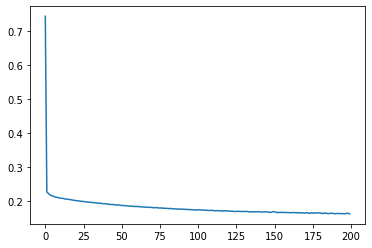

In [44]:
plt.plot(trained_model.history["loss"])

# Prediction

In [45]:
Y_pred = model.predict(X_test)

# Evaluation

In [46]:
from sklearn.metrics import r2_score,mean_squared_error
acc1 = (r2_score(Y_test,Y_pred))
print(acc1)

0.5311732200778996


Model 2

In [47]:
model2 = Sequential()
model2.add(Dense(30, activation="relu", input_dim=10))
model2.add(Dense(30, activation="relu"))
model2.add(Dense(25, activation="relu"))
model2.add(Dense(12, activation="relu"))
model2.add(Dense(10, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(1))

In [48]:
model2.compile(optimizer="adam", loss="mse")

trained_model2 = model2.fit(X_train, Y_train, epochs=200,batch_size=32)

Epoch 1/200
1070/1070 [==============================] - 3s 2ms/step - loss: 0.9916
Epoch 2/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2393
Epoch 3/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2278
Epoch 4/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2223
Epoch 5/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2207
Epoch 6/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2181
Epoch 7/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2155
Epoch 8/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2149
Epoch 9/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2146
Epoch 10/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2132
Epoch 11/200
1070/1070 [==============================] - 2s 2ms/step - loss: 0.2119
Epoch 12/200
1070/1070 [==============================] - 2s 2ms/step - lo

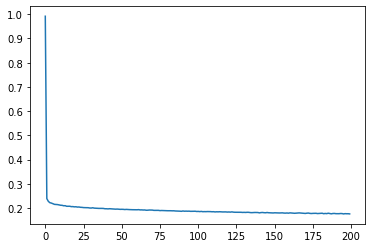

In [49]:
plt.plot(trained_model2.history["loss"])

In [50]:
Y_pred2 = model2.predict(X_test)

In [51]:
from sklearn.metrics import r2_score,mean_squared_error
acc2 = (r2_score(Y_test,Y_pred2))
print(acc2)

0.5547241458559133


Model 3

In [52]:
model3 = Sequential()
model3.add(Dense(30, activation="relu", input_dim=10))
model3.add(Dense(30, activation="relu"))
model3.add(Dense(25, activation="relu"))
model3.add(Dense(20, activation="relu"))
model3.add(Dense(20, activation="relu"))
model3.add(Dense(10, activation="relu"))
model3.add(Dense(1))

In [53]:
model3.compile(optimizer="SGD", loss="mse")

trained_model3 = model3.fit(X_train, Y_train, epochs=200,batch_size=8)

Epoch 1/200
4279/4279 [==============================] - 6s 1ms/step - loss: 0.2871
Epoch 2/200
4279/4279 [==============================] - 5s 1ms/step - loss: 0.2276
Epoch 3/200
4279/4279 [==============================] - 5s 1ms/step - loss: 0.2227
Epoch 4/200
4279/4279 [==============================] - 5s 1ms/step - loss: 0.2202
Epoch 5/200
4279/4279 [==============================] - 6s 1ms/step - loss: 0.2174
Epoch 6/200
4279/4279 [==============================] - 6s 1ms/step - loss: 0.2163
Epoch 7/200
4279/4279 [==============================] - 6s 1ms/step - loss: 0.2145
Epoch 8/200
4279/4279 [==============================] - 5s 1ms/step - loss: 0.2130
Epoch 9/200
4279/4279 [==============================] - 5s 1ms/step - loss: 0.2123
Epoch 10/200
4279/4279 [==============================] - 5s 1ms/step - loss: 0.2110
Epoch 11/200
4279/4279 [==============================] - 5s 1ms/step - loss: 0.2103
Epoch 12/200
4279/4279 [==============================] - 5s 1ms/step - lo

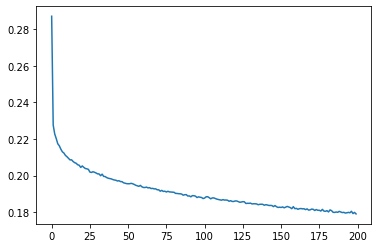

In [54]:
plt.plot(trained_model3.history["loss"])

In [55]:
Y_pred3 = model3.predict(X_test)

In [56]:
acc3 = (r2_score(Y_test,Y_pred3))
print(acc3)

0.561681010236416


Model 4

In [74]:
model4 = Sequential()
model4.add(Dense(50, activation="relu", input_dim=10))
model4.add(Dense(45, activation="relu"))
model4.add(Dense(35, activation="relu"))
model4.add(Dense(30, activation="relu"))
model4.add(Dense(20, activation="relu"))
model4.add(Dense(15, activation="relu"))
model4.add(Dense(1))

In [75]:
model4.compile(optimizer="adam", loss="mse")

trained_model4 = model4.fit(X_train, Y_train, epochs=200,batch_size=16)

Epoch 1/200
2140/2140 [==============================] - 5s 2ms/step - loss: 0.5666
Epoch 2/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2297
Epoch 3/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2229
Epoch 4/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2189
Epoch 5/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2160
Epoch 6/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2140
Epoch 7/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2122
Epoch 8/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2102
Epoch 9/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2085
Epoch 10/200
2140/2140 [==============================] - 4s 2ms/step - loss: 0.2073
Epoch 11/200
2140/2140 [==============================] - 5s 2ms/step - loss: 0.2053
Epoch 12/200
2140/2140 [==============================] - 4s 2ms/step - lo

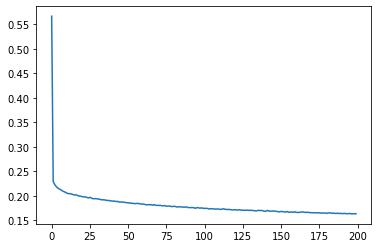

In [76]:
plt.plot(trained_model4.history["loss"])

In [77]:
Y_pred4 = model4.predict(X_test)
acc4 = (r2_score(Y_test,Y_pred4))
print(acc4)

0.5536719766142659


# Ensemble Model

In [117]:
Y_pred_ensemble = (Y_pred+Y_pred2+Y_pred3+Y_pred4)/4

In [118]:
acc_ensemble = (r2_score(Y_test,Y_pred_ensemble))
print(acc_ensemble)

0.5822772429897835


In [123]:
performance = pd.DataFrame([acc1,acc2,acc3,acc4,acc_ensemble],index=['Model 1','Model 2','Model 3','Model 4','Ensemble Model'],columns=['Accuracy'])

In [124]:
performance

,Accuracy
Model 1,0.531173
Model 2,0.554724
Model 3,0.561681
Model 4,0.553672
Ensemble Model,0.582277


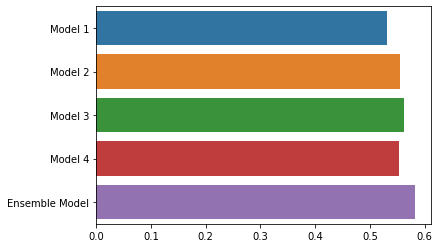

In [125]:
sns.barplot(x=performance.Accuracy.values,y=performance.Accuracy.index)